# Connect to GDrive and download dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 5.5 MB/s 


In [ ]:
import sys

DIR = '/content/drive/MyDrive/'
#sys.path.append('../')
sys.path.append(DIR)

In [ ]:
import numpy as np
import time
import pickle 
import os
import matplotlib.pyplot as plt
#import rasterio as rs
#from src.sample_tiles import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

import tensorflow as tf 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow import keras
import keras
from tensorflow.keras import datasets,models,layers

from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.optimizers import SGD

# Resolve TPU Address

In [ ]:
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

# TPU address
tpu_address = TF_MASTER

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.19.205.58:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.19.205.58:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# ConvLSTM

## Load datasets

In [ ]:
X_data = np.load('/content/drive/MyDrive/TemporalData-Processed-Train/Collated.npy')
y_data = np.load('/content/drive/MyDrive/TemporalData-Processed-Train/labels.npy')
X_test = np.load('/content/drive/MyDrive/TemporalData-Processed-Eval/Collated.npy')
y_test = np.load('/content/drive/MyDrive/TemporalData-Processed-Eval/labels.npy')]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data[:-1], y_data, test_size=0.20, random_state=42)

In [ ]:
print ("Training: {}, {}".format(X_train.shape, y_train.shape))
print ("Validation: {}, {}".format(X_val.shape, y_val.shape))
print ("Testing: {}, {}".format(X_test.shape, y_test.shape))

Training: (6528, 4, 51, 51, 3), (6528, 3)
Validation: (1633, 4, 51, 51, 3), (1633, 3)
Testing: (2752, 4, 51, 51, 3), (2751, 3)


Displaying frames for example 1416.


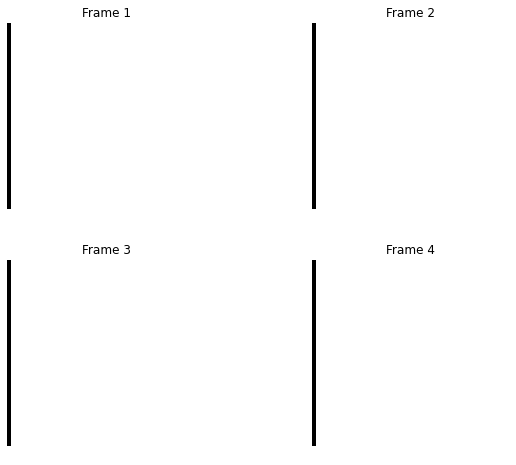

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(X_data)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    new_img = X_data[data_choice][idx]
    ax.imshow(np.squeeze(new_img))
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

In [ ]:
def get_model():
  model = Sequential()
  model.add(
      layers.ConvLSTM2D(
          filters = 32, 
          kernel_size = (3, 3), 
          return_sequences = True, 
          data_format = "channels_last", 
          input_shape = (4, 51, 51, 3) # For RGB: input_shape = (4, 51, 51, 3) # For SWIR input_shape = (4, 51, 51, 1)
      )
  )
  model.add(
      layers.Dropout(0.3)
  )

  model.add(
      layers.ConvLSTM2D(
          filters = 32, 
          kernel_size = (3, 3), 
          return_sequences = False, 
          data_format = "channels_last", 
      )
  )
  model.add(
      layers.Dropout(0.3)
  )
  model.add(
      layers.Flatten()
  )
  model.add(
      layers.Dense(256, activation="relu")
  )
  model.add(
      layers.Dropout(0.3)
  )
  model.add(
      layers.Dense(3, activation = "softmax")
  )
  
  return model  


In [ ]:
# For SWIR:

# x_train=X_train[:, :, :, :, np.newaxis]

# x_val=X_val[:, :, :, :, np.newaxis]

# x_test=X_test[:, :, :, :, np.newaxis]

# print (x_train.shape)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

if use_tpu:
  with strategy.scope():

    model = get_model()
    
    opt = keras.optimizers.Adam()

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
else:
  model = get_model()
    
  opt = keras.optimizers.Adam()

  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

model.summary()

batch_size = 100
epochs = 15

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_10 (ConvLSTM2D)  (None, 4, 49, 49, 32)    40448     
                                                                 
 dropout_15 (Dropout)        (None, 4, 49, 49, 32)     0         
                                                                 
 conv_lstm2d_11 (ConvLSTM2D)  (None, 47, 47, 32)       73856     
                                                                 
 dropout_16 (Dropout)        (None, 47, 47, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 70688)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               18096384  
                                                                 
 dropout_17 (Dropout)        (None, 256)              

In [ ]:
callbacks = [early_stopping, reduce_lr]

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
) 

Epoch 1/15
66/66 [==============================] - 54s 572ms/step - loss: 1.1070 - accuracy: 0.6679 - val_loss: 0.5504 - val_accuracy: 0.7348 - lr: 0.0010
Epoch 2/15
66/66 [==============================] - 17s 257ms/step - loss: 0.5235 - accuracy: 0.7695 - val_loss: 0.5019 - val_accuracy: 0.7936 - lr: 0.0010
Epoch 3/15
66/66 [==============================] - 17s 257ms/step - loss: 0.4741 - accuracy: 0.8027 - val_loss: 0.4347 - val_accuracy: 0.8261 - lr: 0.0010
Epoch 4/15
66/66 [==============================] - 17s 257ms/step - loss: 0.3971 - accuracy: 0.8366 - val_loss: 0.3706 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 5/15
66/66 [==============================] - 17s 258ms/step - loss: 0.3857 - accuracy: 0.8427 - val_loss: 0.3586 - val_accuracy: 0.8530 - lr: 0.0010
Epoch 6/15
66/66 [==============================] - 17s 257ms/step - loss: 0.3577 - accuracy: 0.8542 - val_loss: 0.3650 - val_accuracy: 0.8487 - lr: 0.0010
Epoch 7/15
66/66 [==============================] - 17s 257ms/st

In [ ]:
y_pred = model.predict(X_test[:-1])

In [ ]:

y_pred_ugly = y_pred.argmax(axis=1)
y_test_ugly = y_test.argmax(axis=1)

print(classification_report(y_test_ugly, y_pred_ugly, target_names=['Amazon', 'Cerrado', 'Caatinga'], digits = 3))

              precision    recall  f1-score   support

      Amazon      0.921     0.901     0.911      1171
     Cerrado      0.725     0.995     0.839       800
    Caatinga      0.868     0.565     0.685       780

    accuracy                          0.833      2751
   macro avg      0.838     0.820     0.812      2751
weighted avg      0.849     0.833     0.826      2751



In [ ]:
with open('/content/drive/MyDrive/ConvLSTM/ConvLSTM_History_2_Layers', 'wb') as f:
        pickle.dump(history.history, f)
      
f.close()

In [ ]:
model.save_weights(os.path.join("/content/drive/MyDrive/ConvLSTM/", 'ConvLSTM-2Layers.h5'), overwrite=True)

### Example of how to load the trained model

In [ ]:
# Create a basic model instance
model = get_model()
model.load_weights("/content/drive/MyDrive/ConvLSTM-2Layers.h5")

OSError: ignored

View Training History

In [ ]:
history = pickle.load(open('/content/drive/MyDrive/ConvLSTM/ConvLSTM_History_SWIR', "rb"))

In [ ]:
history_keys = list(history.keys())

loss = history_keys[0]
acc = history_keys[1]
val_loss = history_keys[2]
val_acc = history_keys[3] 

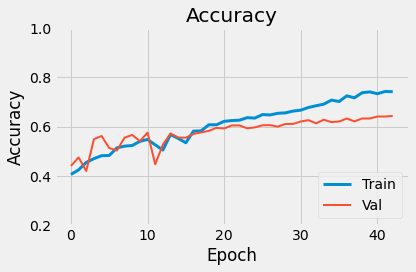

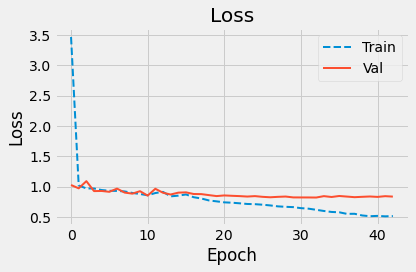

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(history[acc], linewidth=3)
plt.plot(history[val_acc], linewidth=2)
plt.ylim([0.2, 1])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ConvLSTM/AccFigure-SWIR')
plt.show()


# summarize history for loss
plt.style.use('fivethirtyeight')
plt.plot(history[loss], linestyle='--', linewidth=2)
plt.plot(history[val_loss], linewidth=2)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ConvLSTM/LossFigure-SWIR')
plt.show()

# ResNet18

In [ ]:
X_data = np.load('/content/drive/MyDrive/ResNet18-2019-Training/train_data.npy')
y_data = np.load('/content/drive/MyDrive/ResNet18-2019-Training/labels.npy')
X_test = np.load('/content/drive/MyDrive/ResNet18-2019-Training/test_data.npy')
y_test = np.load('/content/drive/MyDrive/ResNet18-2019-Training/test_labels.npy')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.20, random_state=42)

In [ ]:
print ("Training: {}, {}".format(X_train.shape, y_train.shape))
print ("Validation: {}, {}".format(X_val.shape, y_val.shape))
print ("Testing: {}, {}".format(X_test.shape, y_test.shape))

Training: (20782, 51, 51, 3), (20782, 3)
Validation: (5196, 51, 51, 3), (5196, 3)
Testing: (7267, 51, 51, 3), (7267, 3)


In [ ]:
class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        #self.res_2_1 = ResnetBlock(128, down_sample=True)
        #self.res_2_2 = ResnetBlock(128)
        #self.res_3_1 = ResnetBlock(256, down_sample=True)
        #self.res_3_2 = ResnetBlock(256)
        # self.res_4_1 = ResnetBlock(512, down_sample=True)
        # self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        #for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
        for res_block in [self.res_1_1, self.res_1_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [ ]:
#use categorical_crossentropy since the label is one-hot encoded
if use_tpu:
  with strategy.scope():

    model = ResNet18(3)

    model.build(input_shape = (None,51,51,3))

    model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
else:
  model = get_model()
    
  opt = keras.optimizers.Adam()

  model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 


# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          multiple                  9472      
                                                                 
 batch_normalization_65 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 resnet_block_26 (ResnetBloc  multiple                 74368     
 k)                                                              
                                                  

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=4)


batch_size = 100
epochs = 30

callbacks = [early_stopping, reduce_lr]

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
) 

Epoch 1/30
208/208 [==============================] - 12s 40ms/step - loss: 0.1521 - accuracy: 0.9420 - val_loss: 0.2351 - val_accuracy: 0.9080 - lr: 1.0000e-05
Epoch 2/30
208/208 [==============================] - 6s 27ms/step - loss: 0.1494 - accuracy: 0.9437 - val_loss: 0.2337 - val_accuracy: 0.9078 - lr: 1.0000e-05
Epoch 3/30
208/208 [==============================] - 6s 27ms/step - loss: 0.1504 - accuracy: 0.9443 - val_loss: 0.2367 - val_accuracy: 0.9067 - lr: 1.0000e-05
Epoch 4/30
208/208 [==============================] - 6s 27ms/step - loss: 0.1456 - accuracy: 0.9433 - val_loss: 0.2374 - val_accuracy: 0.9067 - lr: 1.0000e-05
Epoch 5/30
208/208 [==============================] - 6s 27ms/step - loss: 0.1449 - accuracy: 0.9465 - val_loss: 0.2337 - val_accuracy: 0.9078 - lr: 1.0000e-05
Epoch 6/30
208/208 [==============================] - 5s 26ms/step - loss: 0.1432 - accuracy: 0.9448 - val_loss: 0.2374 - val_accuracy: 0.9092 - lr: 1.0000e-05
Epoch 7/30
208/208 [===================

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

y_pred_ugly = y_pred.argmax(axis=1)
y_test_ugly = y_test.argmax(axis=1)

print(classification_report(y_test_ugly, y_pred_ugly, target_names=['Amazon', 'Cerrado', 'Caatinga'], digits = 3))

              precision    recall  f1-score   support

      Amazon      0.918     0.895     0.907      2344
     Cerrado      0.836     0.997     0.909      2367
    Caatinga      0.937     0.791     0.858      2556

    accuracy                          0.892      7267
   macro avg      0.897     0.895     0.891      7267
weighted avg      0.898     0.892     0.890      7267



In [ ]:
with open('/content/drive/MyDrive/ResNet18-2019-Training/history', 'wb') as f:
        pickle.dump(history.history, f)
      
f.close()

In [ ]:
model.save_weights(os.path.join("/content/drive/MyDrive/ResNet18-2019-Training/", 'Model_1.h5'), overwrite=True)

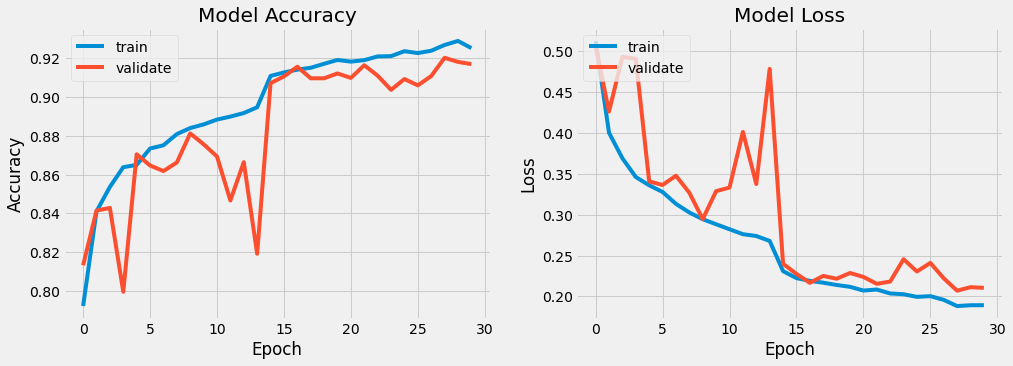

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
plotmodelhistory(history)

## Load an old model

In [ ]:
# Create a basic model instance
model.load_weights("/content/drive/MyDrive/ResNet18-2019-Training/Model_1.h5")